# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [19]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [20]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

Defaulting to user installation because normal site-packages is not writeable


0

Importamos todas las liberías necesarias a lo largo de la práctica:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data = pd.read_csv(filename, delimiter=';')
data.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Vamos a quitar la columna id ya que no resulta de utilidad para el análisis al tratarse de un mero identificador

In [23]:
data.drop('id', axis=1, inplace=True)

Vamos a comprobar si hay NaNs en nuestro set de datos:

In [24]:
null_values = data.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64

No hay NaNs.

Vamos a visualizar las distribuciones de las variables de nuestro dataset:

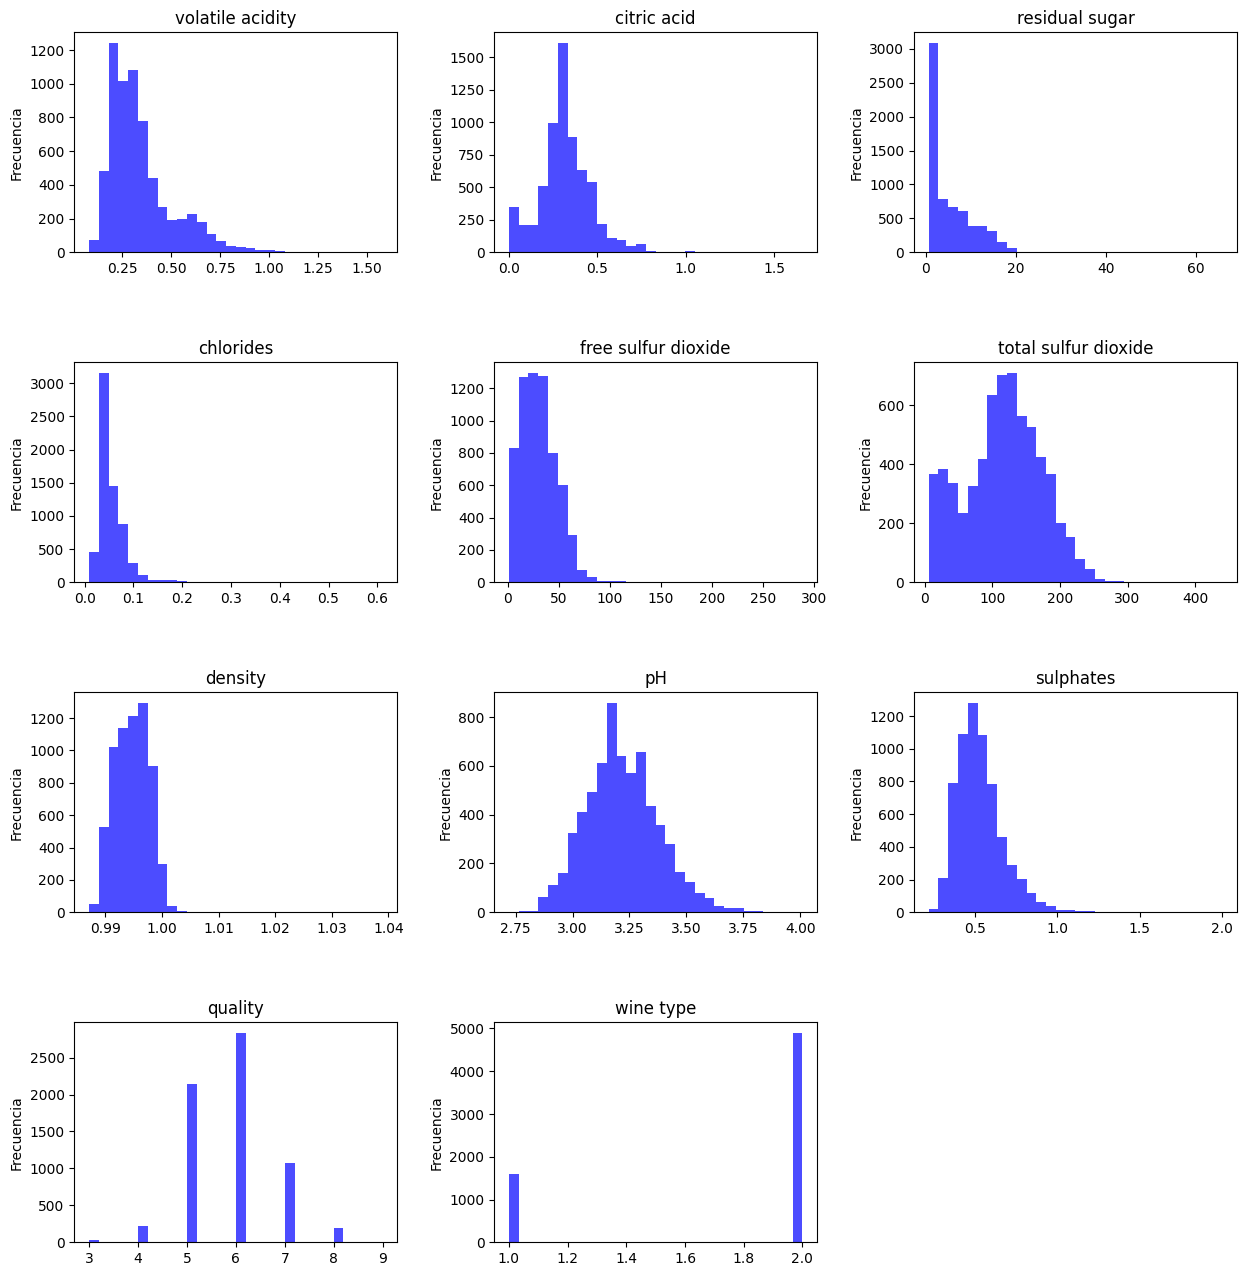

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.ravel() 

for i, col in enumerate(data.columns[1:-1]):
    axes[i].hist(data[col], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_ylabel('Frecuencia')
for j in range(i+1, 15):
    fig.delaxes(axes[j])

plt.show()

- Distribuciones Asimétricas: Algunas variables como residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide y alcohol muestran distribuciones altamente asimétricas.
- Distribuciones más simétricas y acotadas: Variables como fixed acidity, pH, density y sulphates parecen tener distribuciones más simétricas y están más concentradas en rangos específicos.
- Variables categóricas: quality y wine type

In [26]:
outlier_stats = data.describe(percentiles=[.25, .5, .75, .95])
outlier_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,5.818378,1.753886,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,0.873255,0.430779,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000,1.000000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000,2.000000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000,2.000000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000,2.000000,11.300000
95%,9.800000,0.670000,0.560000,15.000000,0.102000,61.000000,206.000000,0.999392,3.500000,0.790000,7.000000,2.000000,12.700000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,9.000000,2.000000,14.900000


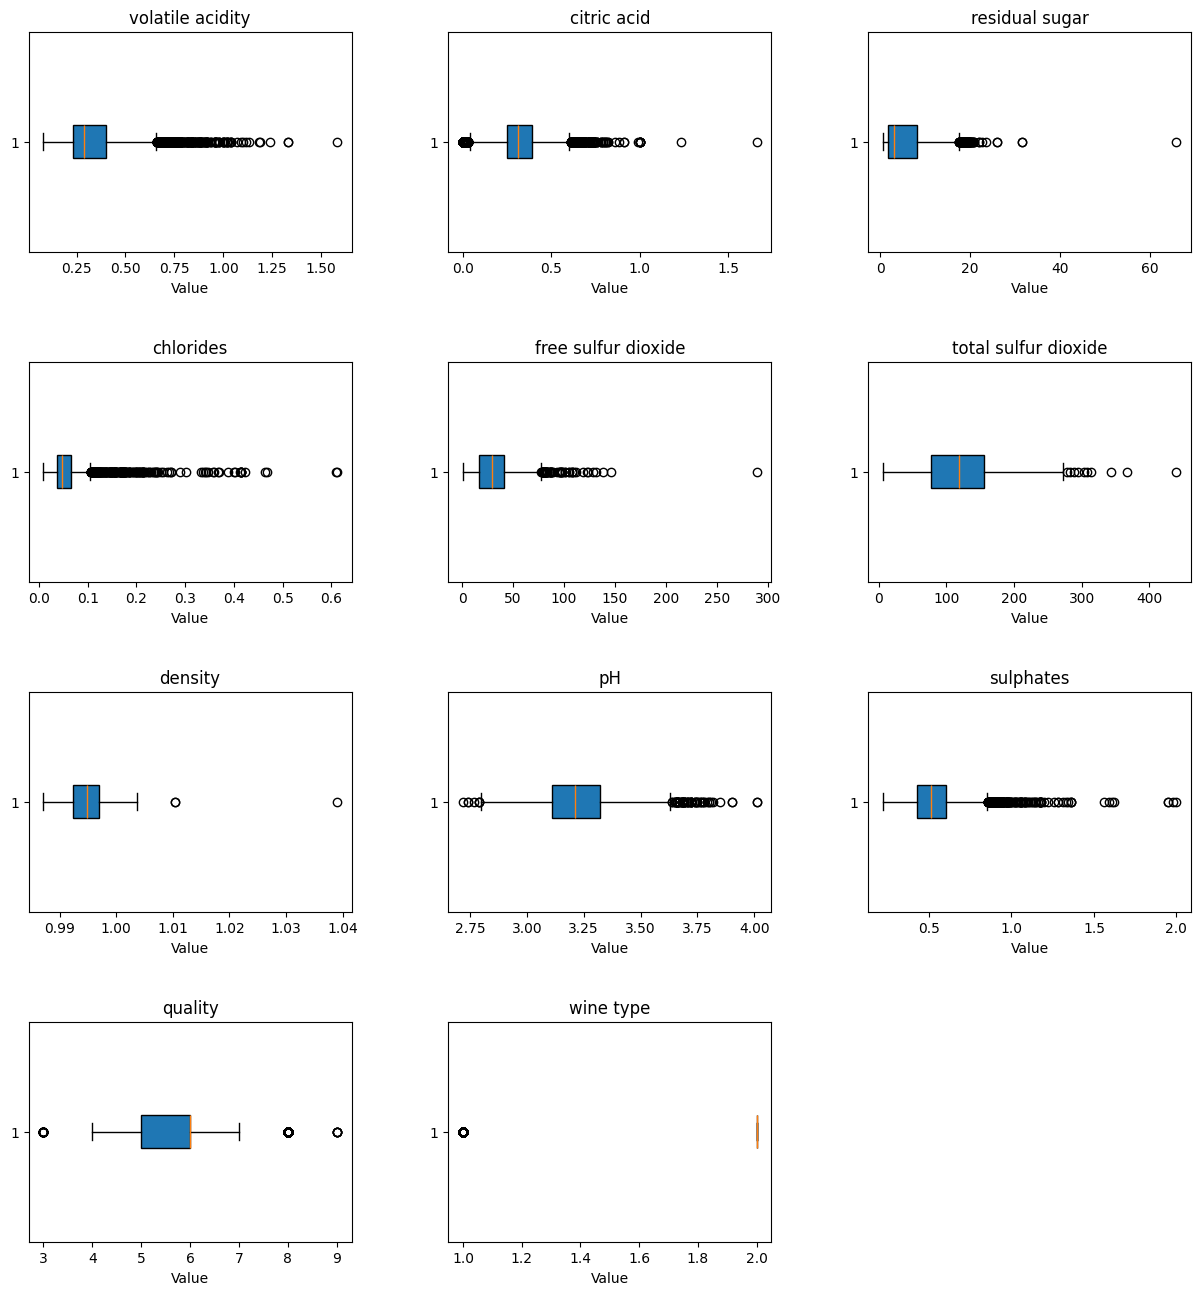

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.ravel() 

for i, col in enumerate(data.columns[1:-1]):
    axes[i].boxplot(data[col], vert=False, patch_artist=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
for j in range(i+1, 15):
    fig.delaxes(axes[j])

plt.show()

Los boxplots revelan la presencia de varios outliers en muchas de las variables, como residual sugar, chlorides, free sulfur dioxide, y total sulfur dioxide. La presencia de estos valores extremos es importante considerarla, porque pueden afectar la formación de clusters.

Vamos a aplicar una transformación logarítmica puede ayudar a reducir la asimetría y mitigar el efecto de los outliers. Nótese que hay valores 0 en nuestras variables, por lo que voy a añadir una constante para evitar problemas con el logaritmo de 0.

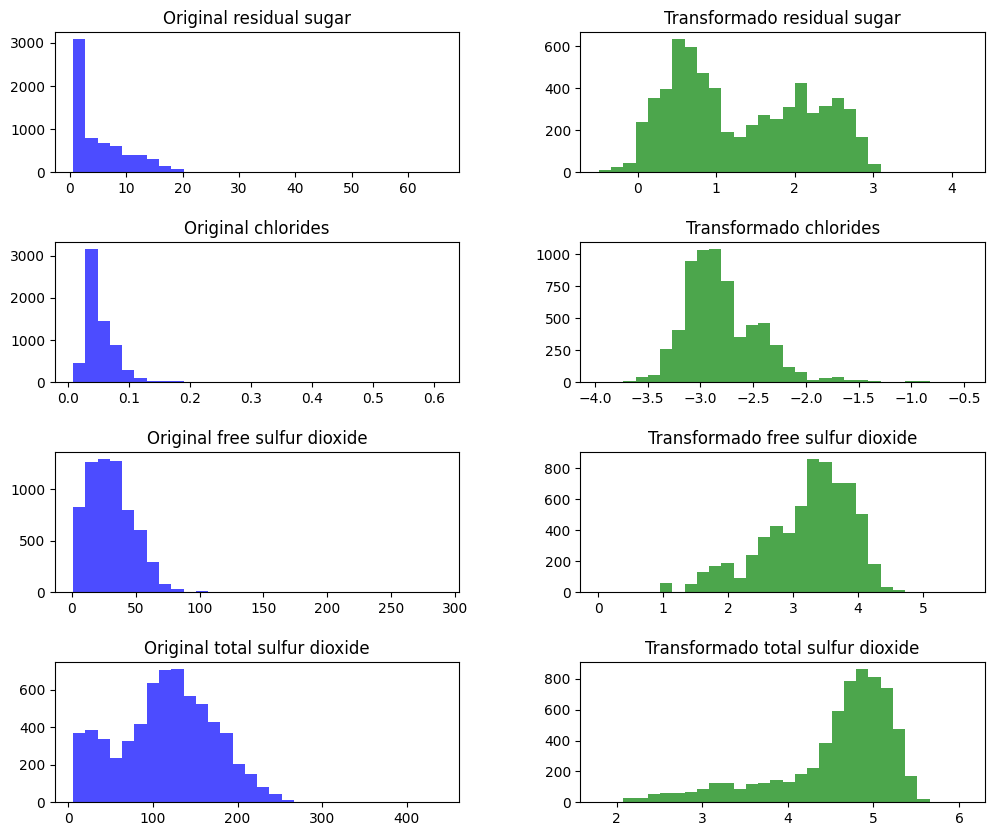

In [33]:
transform_vars = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']
data_transformed = data.copy()
for var in transform_vars:
    data_transformed[var] = np.log(data_transformed[var] + 0.01)
fig, axes = plt.subplots(nrows=len(transform_vars), ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(transform_vars):
    axes[i, 0].hist(data[col], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original {col}')
    axes[i, 1].hist(data_transformed[col], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Transformado {col}')

plt.show()

La transformación logarítmica ha ayudado a reducir la asimetría y a manejar los valores extremos de manera más efectiva.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos = pd.DataFrame(scaler.fit_transform(data_transformed), columns=data_transformed.columns)
datos = datos.drop(columns=[col for col in datos.columns if col in transform_vars])

datos.head()

,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,quality,wine type,alcohol,residual sugar_log,chlorides_log,free sulfur dioxide_log,total sulfur dioxide_log,sulphates_log
0,0.142473,2.188833,-2.192833,1.034993,1.813090,0.193097,-0.937230,-1.75019,-0.915464,-0.815173,0.624554,-1.193601,-1.463348,0.250355
1,0.451036,3.282235,-2.192833,0.701486,-0.115073,0.999579,-0.937230,-1.75019,-0.580068,-0.498175,1.281999,-0.013944,-0.513260,1.059213
2,0.451036,2.553300,-1.917553,0.768188,0.258120,0.797958,-0.937230,-1.75019,-0.580068,-0.625740,1.104012,-0.754684,-0.816778,0.862549
3,3.073817,-0.362438,1.661085,1.101694,-0.363868,0.327510,0.207999,-1.75019,-0.580068,-0.815173,0.594352,-0.574982,-0.668662,0.389396
4,0.142473,2.188833,-2.192833,1.034993,1.813090,0.193097,-0.937230,-1.75019,-0.915464,-0.815173,0.624554,-1.193601,-1.463348,0.250355


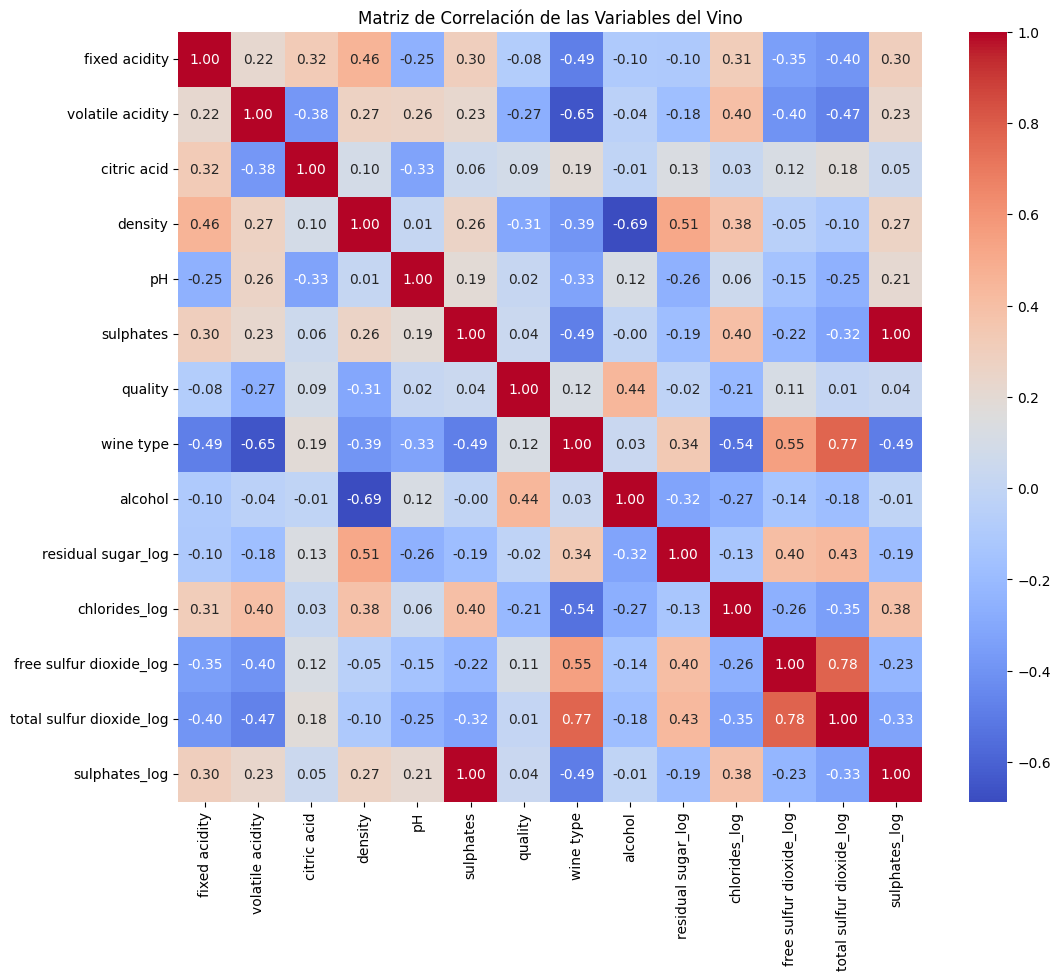

In [38]:
correlation_matrix = datos.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables del Vino')
plt.show()

La matriz de correlación muestra cómo cada variable se relaciona con las demás, incluida la calidad del vino. A continuación, algunos puntos destacados para la selección de variables para el agrupamiento:

- alcohol parece tener una correlación positiva moderada con quality (0.44), lo que indica que podría ser una variable importante para el modelo de agrupamiento.
- density tiene una correlación negativa con quality (-0.31).
- Otras variables como chlorides (-0.21) y volatile acidity (-0.27) tienen correlaciones negativas con quality, pero son ligeramente más débiles.